# Project 3 - Risk Analysis in Public Transportation in London (2015-2018)

This project was conducted for Data Science Academy's training program "Formação Cientista de Dados".

The dataset used in this project can be found for download [here](https://data.world/makeovermonday/2018w51).

The graph design was made to match Fabbrica's Growth Consulting visual identity and communication standards.

## Objective

The objective of this project is to answer 10 business questions related to the risk analysis of transportation in London between the years of 2015-2018.

1. How many incidents occured per sex? 
2. What age range is the most common in incidents?
3. What is the percentage of incidents by event type?
4. How was the evolution of incidents per month through time?
5. When the incident was a "Collision Incident", in which month was there the largest number of Female involved?
6. What was the average number of incidents per month involving children?
7. Considering the description of the incident as "Injuries treated on scene", what is the total number of incidents with people of Male and Female sex?
8. In the year of 2017, in which month were there more incidents with elderly people?
9. What's the distribution of incidents along time considering the conductor?
10. What's the most common type of incident involving cyclists?

## Tools

The suggested tools for this project are Python and SQL.

# Importing libraries

* Pandas: Working with DataFrames
* Numpy: Efficient Mathematical Operations
* Seaborn and Matplotlib: Graphic Design
* Calendar: Getting names of the months of the year
* sqldf: Being able to use direct SQL queries to get DataFrame slices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from pandasql import sqldf
from IPython.display import display, Markdown, Latex

In [2]:
df = pd.read_excel('TFL Bus Safety.xlsx')
df

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


# General Overview of data

* Pandas "info" method: Checking counts of columns and their types
* Pandas "describe" method: Checking basic statistical information for the numerical columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [4]:
df.describe()

,Year
count,23158.000000
mean,2016.449607
std,1.074073
min,2015.000000
25%,2016.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


# Setting standards for graph design

In [5]:
fabbrica_strongblue = ['#002060']
fabbrica_bluepalette = ['#001236', '#002060', '#4C73B6', '#8CB6D9', '#DEEBF3']
fabbrica_lightgrey = ['#9D9D9D']
fabbrica_greypalette = ['#222A35', '#595959', '#9D9D9D', '#C0C0C0', '#EDEDED']

sns.set(font = 'calibri')
sns.set_palette(sns.color_palette(fabbrica_bluepalette))

In [6]:
def format_number(value):
    while value >= 1000:
        value = value/1000
    return f'{value:.1f}'

# Answering the business questions

For each business question, we will create a graph that answers it, along with some highlights with the most interesting information extracted from the graph, along with some conclusions or notes.

# 1 - How many incidents occured per sex? 

In [7]:
pysqldf = lambda q: sqldf(q, globals())

In [8]:
q = """SELECT [Victims Sex], COUNT(*) AS [Number of Incidents]
       FROM df 
       GROUP BY [Victims Sex]
       ORDER BY [Number of Incidents] DESC;"""

incidents_by_gender = pysqldf(q)
incidents_by_gender

,Victims Sex,Number of Incidents
0,Female,11847
1,Male,7709
2,Unknown,3602


In [9]:
def fgc_comparison_column(data, x, y, palette = fabbrica_strongblue, formatting = '%d', size = (4,5), width = 0.6, ):
    plt.figure(figsize = size)
    # Create bar plot
    ax = sns.barplot(data = data, x = x, y = y, palette = palette, width = width)
    # Add data labels
    ax.bar_label(ax.containers[0], fmt = formatting, fontweight='bold')
    # Remove ylabel
    ax.set_yticks([])
    # Set plot title and labels
    #plt.suptitle(title)
    #plt.title(unit)
    plt.xlabel(None)
    plt.ylabel(None)
    # Setting background
    ax.set_facecolor("white")
    # Show plot
    plt.show();
    return ax

#### Number of Incidents in London Public Transportation By Sex (2015-2018)
&nbsp;&nbsp;&nbsp;In thousands

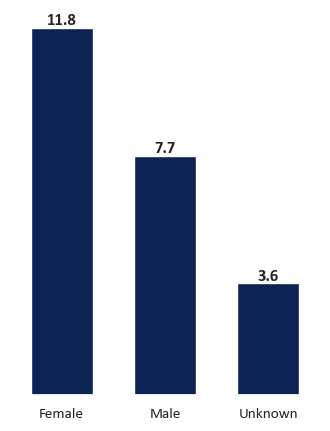

In [10]:
display(Markdown('#### Number of Incidents in London Public Transportation By Sex (2015-2018)\n&nbsp;&nbsp;&nbsp;In thousands'))
fgc_comparison_column(incidents_by_gender, x = 'Victims Sex', y = 'Number of Incidents', size = (4,5), formatting = format_number);

## Highlights

* **Females** are the most involved in incidents, with over 11.8k incidents, versus 7.7k incidents involving men.
* It is **difficult to reach any conclusion** without analyzing other information in this dataset, so let's do that. 

In [11]:
event_by_sex = pd.crosstab(df['Incident Event Type'], df['Victims Sex'])
event_by_sex

Victims Sex,Female,Male,Unknown
Incident Event Type,,,
Activity Incident Event,36,64,14
Assault,104,451,35
Collision Incident,1558,1973,635
Fire,2,4,0
Onboard Injuries,3067,1682,1814
Personal Injury,2598,1472,526
Robbery,2,1,0
Safety Critical Failure,24,37,5
Slip Trip Fall,4423,1992,566


In [12]:
others = event_by_sex[event_by_sex['Female'] < 100].copy()
others

Victims Sex,Female,Male,Unknown
Incident Event Type,,,
Activity Incident Event,36,64,14
Fire,2,4,0
Robbery,2,1,0
Safety Critical Failure,24,37,5
Vandalism Hooliganism,33,33,7


In [13]:
others.loc['Others'] = others.sum(axis = 0)
others.loc['Others']

Victims Sex
Female      97
Male       139
Unknown     26
Name: Others, dtype: int64

In [14]:
event_by_sex = event_by_sex[event_by_sex['Female'] >= 100].copy()
event_by_sex.loc['Others'] = others.loc['Others']
event_by_sex

Victims Sex,Female,Male,Unknown
Incident Event Type,,,
Assault,104,451,35
Collision Incident,1558,1973,635
Onboard Injuries,3067,1682,1814
Personal Injury,2598,1472,526
Slip Trip Fall,4423,1992,566
Others,97,139,26


#### Number of incidents in London Public Transportation by Sex and Event Type (2015-2018)
&nbsp;&nbsp;&nbsp;In thousands

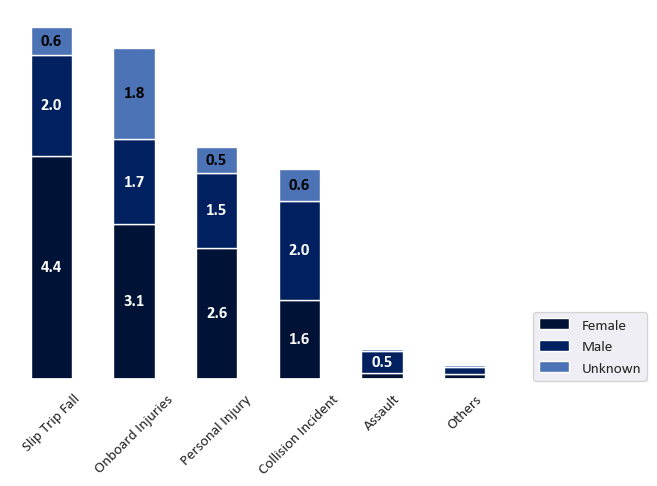

In [15]:
display(Markdown('#### Number of incidents in London Public Transportation by Sex and Event Type (2015-2018)\n&nbsp;&nbsp;&nbsp;In thousands'))
ax = event_by_sex.sort_values(by= 'Female', ascending = False).plot(kind = 'bar', stacked = True)

for i, rect in enumerate(ax.patches):
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() / 2
    if rect.get_height() < 400:
        continue
    label = int(rect.get_height())
    if i < 12:
        ax.text(x, y, f"{label/1000:.1f}", ha='center', va='center', weight = 'bold', color = 'white')
    else:
        ax.text(x, y, f"{label/1000:.1f}", ha='center', va='center', weight = 'bold', color = 'black')

plt.legend(bbox_to_anchor=(1.3, 0.2));
plt.yticks([])
plt.xticks(rotation = 45)
ax.set_facecolor('xkcd:white')
plt.grid(False)
plt.ylabel(None)
plt.xlabel(None);

## Highlights

* **Female** are more involved in **Slip Trip Falls, Onboard Injuries and Personal Injuries**, while **Male** are more involved in **Collision Incidents, and Assaults**.
* The other type of incidents **do not have a relevant number of occurences** in the period.

# 2 - Which age range is the most involved in accidents?

In [16]:
q = """SELECT [Victims Age], COUNT(*) AS [Number of Incidents]
       FROM df 
       GROUP BY [Victims Age]
       ORDER BY [Number of Incidents] DESC;"""

incidents_by_age = pysqldf(q)
incidents_by_age

,Victims Age,Number of Incidents
0,Adult,10754
1,Unknown,7135
2,Elderly,2769
3,Child,2181
4,Youth,319


In [17]:
# This graph won't work with the original formatting because numbers have a different order of magnitude
def special_format(number):
    return f"{number/1000: .1f}"

#### Number of Incidents in London Public Transportation By Age Range (2015-2018)
&nbsp;&nbsp;&nbsp;In thousands

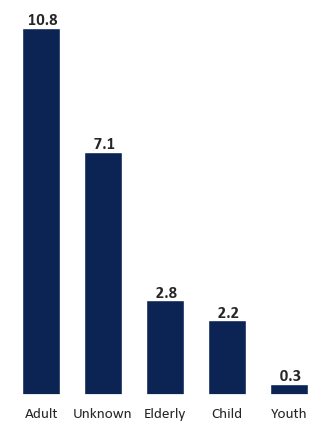

In [18]:
display(Markdown('#### Number of Incidents in London Public Transportation By Age Range (2015-2018)\n&nbsp;&nbsp;&nbsp;In thousands'))
fgc_comparison_column(incidents_by_age, x = 'Victims Age', y = 'Number of Incidents', size = (4,5), formatting = special_format);

## Highlights

* Since **adults** are the ones who use public transportation the most, **it is expected for them to be the most involved** in incidents.
* **Youth** are the **least involved** in incidents.
    * This could be due to **different commuting patterns** or demographic factors such as **socioeconomic status** and **geographic location**.

# 3 - What is the percentage of incidents by event type?

In [19]:
q = """SELECT [Incident Event Type], COUNT(*) AS [Number of Incidents]
       FROM df 
       GROUP BY [Incident Event Type]
       ORDER BY [Number of Incidents] DESC;"""

incidents_by_type = pysqldf(q)
incidents_by_type

,Incident Event Type,Number of Incidents
0,Slip Trip Fall,6981
1,Onboard Injuries,6563
2,Personal Injury,4596
3,Collision Incident,4166
4,Assault,590
5,Activity Incident Event,114
6,Vandalism Hooliganism,73
7,Safety Critical Failure,66
8,Fire,6
9,Robbery,3


## Grouping least representative categories as "Others"

For this example, to avoid having a Pie Chart with too many categories, the event types that represent less than 5% of the data will all be grouped together.

In [20]:
threshold = incidents_by_type['Number of Incidents'].sum() * 0.05

others = incidents_by_type[incidents_by_type['Number of Incidents'] < threshold]
others_count = others['Number of Incidents'].sum()
others_row = pd.DataFrame.from_dict({'Incident Event Type': 'Others', 'Number of Incidents': others_count}, orient ='index').T

grouped_incidents_by_type = incidents_by_type[incidents_by_type['Number of Incidents'] > threshold]
grouped_incidents_by_type = pd.concat([grouped_incidents_by_type, others_row], axis = 0, ignore_index = True)

grouped_incidents_by_type

,Incident Event Type,Number of Incidents
0,Slip Trip Fall,6981
1,Onboard Injuries,6563
2,Personal Injury,4596
3,Collision Incident,4166
4,Others,852


In [21]:
def fgc_composition_pie(data, labels, autopct = '%1.1f%%'):
    plt.figure(figsize = (8,10))
    colors = fabbrica_bluepalette[:len(data)]
    patches, texts, autotexts = plt.pie(data, labels = None, autopct = autopct, colors = colors, counterclock = False, startangle = 120)
    
    for i, autotext in enumerate(autotexts):
        if i < 4:
            autotext.set_color('white')
        else:
            autotext.set_color('black')
        autotext.set_fontweight('bold')
    
    plt.legend(labels, loc = 'lower right')

#### Representativiness of Number of Incidents in London Public Transportation by Incident Type (2015-2018)
&nbsp;&nbsp;&nbsp;As a percentage

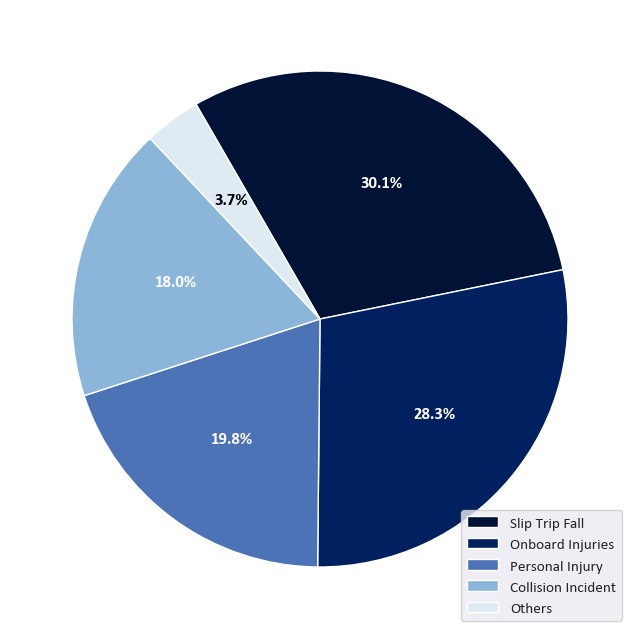

In [22]:
data = grouped_incidents_by_type['Number of Incidents']
labels = grouped_incidents_by_type['Incident Event Type']

display(Markdown('#### Representativiness of Number of Incidents in London Public Transportation by Incident Type (2015-2018)\n&nbsp;&nbsp;&nbsp;As a percentage'))

fgc_composition_pie(data, labels = labels)

## Highlights

* **Slip Trip Falls** and **Onboard Injuries** are the **most common types of incidents**. Since these are the least serious types, it is also an expected results.
* **Assault, Vandalism, Fire, and Robbery**, among other more serious issues, represent **only 3.7%** of the incidents in London Public Transportation.

# 4- How was the evolution of number of incidents per month?

In [23]:
q = """SELECT [Date Of Incident], COUNT(*) AS [Number of Incidents]
       FROM df 
       GROUP BY [Date Of Incident]
       ORDER BY [Date Of Incident] ASC;"""

incidents_by_month = pysqldf(q)
incidents_by_month

,Date Of Incident,Number of Incidents
0,2015-01-01 00:00:00.000000,399
1,2015-02-01 00:00:00.000000,371
2,2015-03-01 00:00:00.000000,460
3,2015-04-01 00:00:00.000000,470
4,2015-05-01 00:00:00.000000,472
5,2015-06-01 00:00:00.000000,564
6,2015-07-01 00:00:00.000000,558
7,2015-08-01 00:00:00.000000,446
8,2015-09-01 00:00:00.000000,487
9,2015-10-01 00:00:00.000000,470


In [24]:
incidents_by_month['Date Of Incident'] = pd.to_datetime(incidents_by_month['Date Of Incident'])
incidents_by_month

,Date Of Incident,Number of Incidents
0,2015-01-01,399
1,2015-02-01,371
2,2015-03-01,460
3,2015-04-01,470
4,2015-05-01,472
5,2015-06-01,564
6,2015-07-01,558
7,2015-08-01,446
8,2015-09-01,487
9,2015-10-01,470


In [25]:
incidents_by_month['MonthYear'] = incidents_by_month['Date Of Incident'].dt.strftime('%b').str.lower() + '-' +  incidents_by_month['Date Of Incident'].dt.year.astype('str')
incidents_by_month

,Date Of Incident,Number of Incidents,MonthYear
0,2015-01-01,399,jan-2015
1,2015-02-01,371,feb-2015
2,2015-03-01,460,mar-2015
3,2015-04-01,470,apr-2015
4,2015-05-01,472,may-2015
5,2015-06-01,564,jun-2015
6,2015-07-01,558,jul-2015
7,2015-08-01,446,aug-2015
8,2015-09-01,487,sep-2015
9,2015-10-01,470,oct-2015


In [26]:
def fgc_comparison_line(data, x, y, x_tick_every):
    # Set Seaborn style
    sns.set_style("whitegrid")

    plt.figure(figsize = (12,9))

    ax = sns.lineplot(data = data, x = x, y = y, color = '#002060');
    plt.xticks(rotation = 45);

    plt.xticks(data[x].values[::x_tick_every])  # Remove x-axis ticks
    #plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label

    y_values =  data[y]
    x_values = data[x]

    index_of_max = y_values.idxmax()
    index_of_min = y_values.idxmin()

    # Annotate the highest value
    plt.annotate(f'{y_values.loc[index_of_max]}', xy=(x_values.loc[index_of_max], y_values.loc[index_of_max]), xytext=(5, 5),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'), weight = 'bold')

    # Annotate the lowest value
    plt.annotate(f'{y_values.loc[index_of_min]}', xy=(x_values.loc[index_of_min], y_values.loc[index_of_min]), xytext=(5, -10),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'), weight = 'bold')

#### Evolution of Number of Incidents in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;As a number

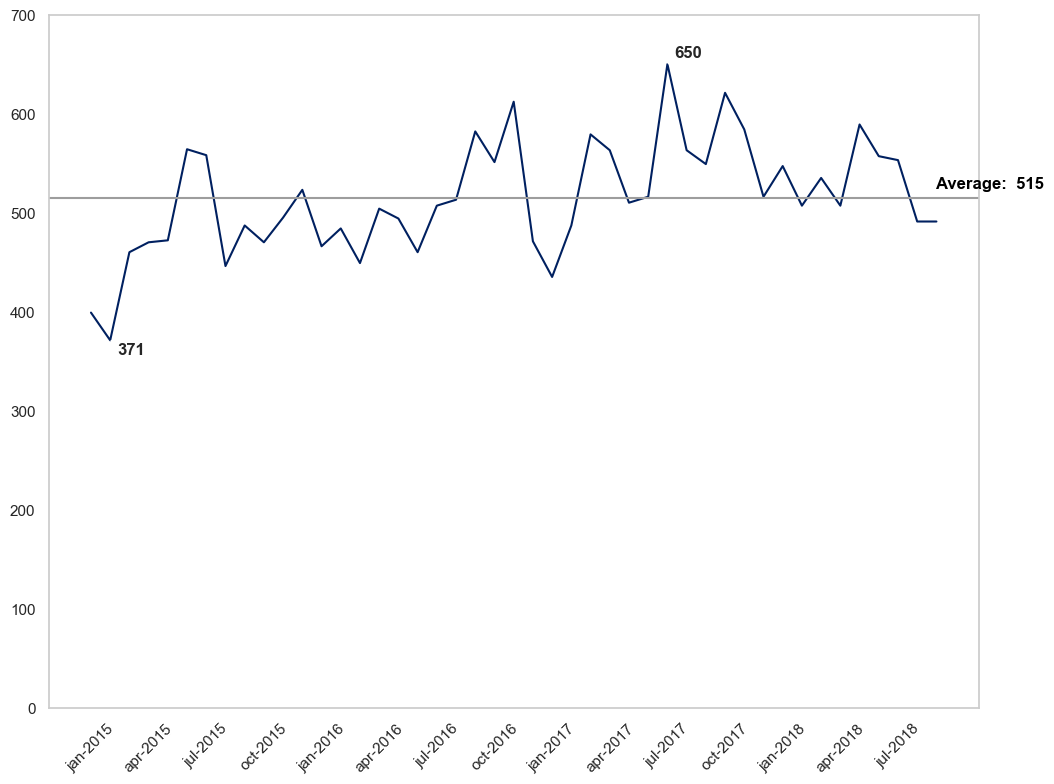

In [27]:
display(Markdown('#### Evolution of Number of Incidents in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_line(data = incidents_by_month, x = 'MonthYear', y = 'Number of Incidents', x_tick_every=3)
plt.ylim(0, 700)
# Add an average line
avg = incidents_by_month['Number of Incidents'].mean()
plt.axhline(avg, color = '#9D9D9D')
plt.annotate(f'Average: {avg: .0f}', xy=(incidents_by_month['MonthYear'].values[-1], avg), xytext=(incidents_by_month['MonthYear'].values[-1], avg + 10),
             color='black', weight='bold', ha='left');

## Highlights

* The **peak** in the number of incidents (650) occured in **July 2017**. 
* **February 2015** had the lowest number of incidents.
* After **July 2016**, it appears that the average number of incidents has increased.

## Hypothesis: Average number of incidents increased after July 2016

To test the Hypothesis, a Moving Average will be used.

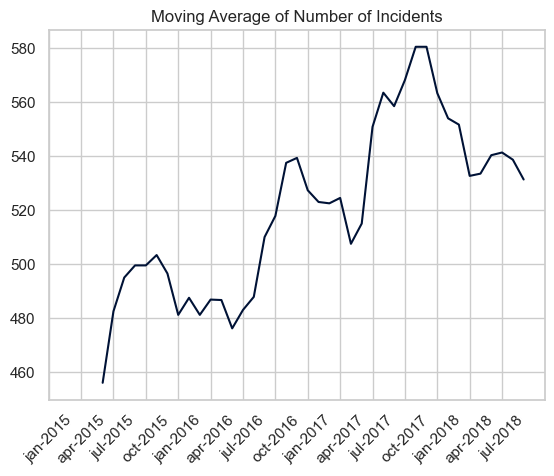

In [71]:
rolling_mean = incidents_by_month['Number of Incidents'].rolling(window = 6).mean()
plt.plot(rolling_mean)
plt.title('Moving Average of Number of Incidents')
plt.xticks(range(0, len(rolling_mean), 3), incidents_by_month['MonthYear'].iloc[::3], rotation = 45);

We can clearly see an upward trend in the Moving Average of the number of incidents after July 2016.

## Conclusion: The average number of incidents increased after July 2016.

# 5 - When the accident was type "Collision Incident", in which month was there the biggest number of people involved of Gender Female?

In [28]:
q = """SELECT [Date Of Incident], [Incident Event Type], [Victims Sex], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Incident Event Type] = 'Collision Incident' AND [Victims Sex] = 'Female'
       GROUP BY [Date Of Incident]
       ORDER BY [Date Of Incident] ASC;"""

collisions_by_sex = pysqldf(q)
collisions_by_sex

,Date Of Incident,Incident Event Type,Victims Sex,Number of Incidents
0,2015-01-01 00:00:00.000000,Collision Incident,Female,16
1,2015-02-01 00:00:00.000000,Collision Incident,Female,25
2,2015-03-01 00:00:00.000000,Collision Incident,Female,26
3,2015-04-01 00:00:00.000000,Collision Incident,Female,38
4,2015-05-01 00:00:00.000000,Collision Incident,Female,26
5,2015-06-01 00:00:00.000000,Collision Incident,Female,43
6,2015-07-01 00:00:00.000000,Collision Incident,Female,32
7,2015-08-01 00:00:00.000000,Collision Incident,Female,20
8,2015-09-01 00:00:00.000000,Collision Incident,Female,45
9,2015-10-01 00:00:00.000000,Collision Incident,Female,28


In [29]:
collisions_by_sex['Date Of Incident'] = pd.to_datetime(collisions_by_sex['Date Of Incident'])

In [30]:
collisions_by_sex['MonthYear'] = collisions_by_sex['Date Of Incident'].dt.strftime('%b').str.lower() + '-' +  collisions_by_sex['Date Of Incident'].dt.year.astype('str')
collisions_by_sex

,Date Of Incident,Incident Event Type,Victims Sex,Number of Incidents,MonthYear
0,2015-01-01,Collision Incident,Female,16,jan-2015
1,2015-02-01,Collision Incident,Female,25,feb-2015
2,2015-03-01,Collision Incident,Female,26,mar-2015
3,2015-04-01,Collision Incident,Female,38,apr-2015
4,2015-05-01,Collision Incident,Female,26,may-2015
5,2015-06-01,Collision Incident,Female,43,jun-2015
6,2015-07-01,Collision Incident,Female,32,jul-2015
7,2015-08-01,Collision Incident,Female,20,aug-2015
8,2015-09-01,Collision Incident,Female,45,sep-2015
9,2015-10-01,Collision Incident,Female,28,oct-2015


#### Evolution of Number of Collision Incidents with Females in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;As a number

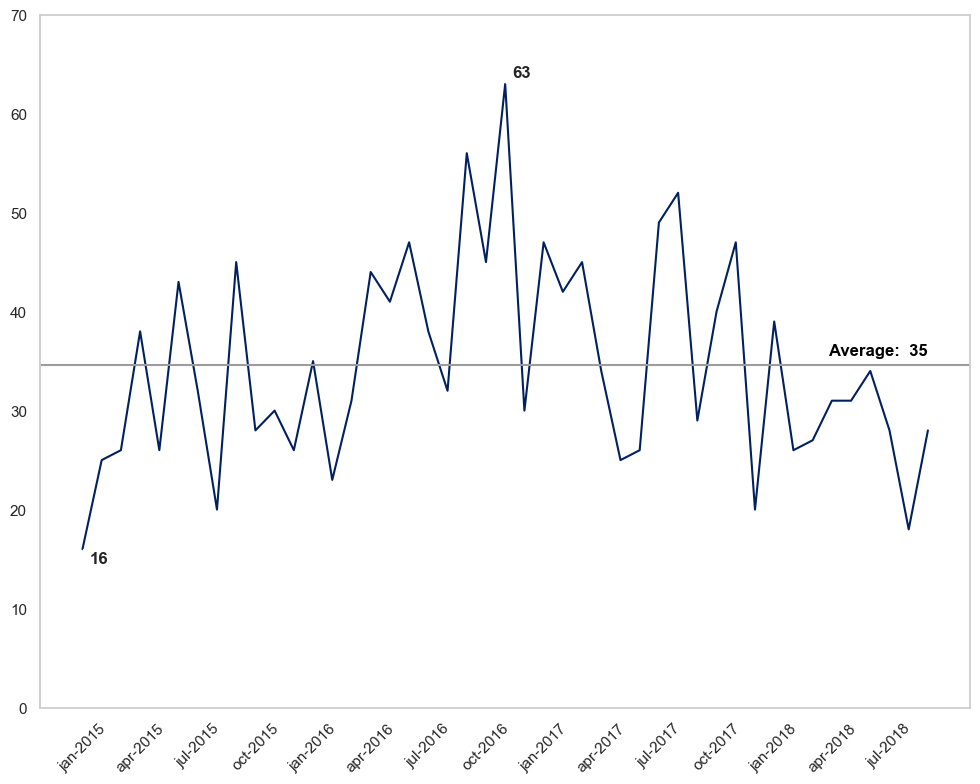

In [31]:
display(Markdown('#### Evolution of Number of Collision Incidents with Females in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_line(data = collisions_by_sex, x = 'MonthYear', y = 'Number of Incidents', x_tick_every=3)
plt.ylim(0, 70)
avg = collisions_by_sex['Number of Incidents'].mean()
plt.axhline(avg, color = '#9D9D9D')
plt.annotate(f'Average: {avg: .0f}', xy=(incidents_by_month['MonthYear'].values[-1], avg), xytext=(incidents_by_month['MonthYear'].values[-1], avg + 1),
             color='black', weight='bold', ha='right');

## Highlights

* The **peak** in the number of Collision Incidents involving Female occured in **November 2016** (63 incidents).
* **January 2015** had the lowest number of Collision Incidents (16) involving Female.
* The average number of incidents with Female was **higher** between April 2016 and April 2017.

# 6 - What's the average number of incidents by month with children?

In [32]:
q = """SELECT [Date Of Incident], [Victims Age], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Victims Age] = 'Child'
       GROUP BY [Date Of Incident]
       ORDER BY [Date Of Incident] ASC;"""

incidents_children = pysqldf(q)
incidents_children

,Date Of Incident,Victims Age,Number of Incidents
0,2015-01-01 00:00:00.000000,Child,31
1,2015-02-01 00:00:00.000000,Child,27
2,2015-03-01 00:00:00.000000,Child,33
3,2015-04-01 00:00:00.000000,Child,36
4,2015-05-01 00:00:00.000000,Child,44
5,2015-06-01 00:00:00.000000,Child,42
6,2015-07-01 00:00:00.000000,Child,40
7,2015-08-01 00:00:00.000000,Child,40
8,2015-09-01 00:00:00.000000,Child,38
9,2015-10-01 00:00:00.000000,Child,33


In [33]:
incidents_children['Date Of Incident'] = pd.to_datetime(incidents_children['Date Of Incident'])

In [34]:
incidents_children['MonthYear'] = incidents_children['Date Of Incident'].dt.strftime('%b').str.lower() + '-' +  incidents_children['Date Of Incident'].dt.year.astype('str')
incidents_children

,Date Of Incident,Victims Age,Number of Incidents,MonthYear
0,2015-01-01,Child,31,jan-2015
1,2015-02-01,Child,27,feb-2015
2,2015-03-01,Child,33,mar-2015
3,2015-04-01,Child,36,apr-2015
4,2015-05-01,Child,44,may-2015
5,2015-06-01,Child,42,jun-2015
6,2015-07-01,Child,40,jul-2015
7,2015-08-01,Child,40,aug-2015
8,2015-09-01,Child,38,sep-2015
9,2015-10-01,Child,33,oct-2015


#### Evolution of Number of Incidents with Children in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;As a number

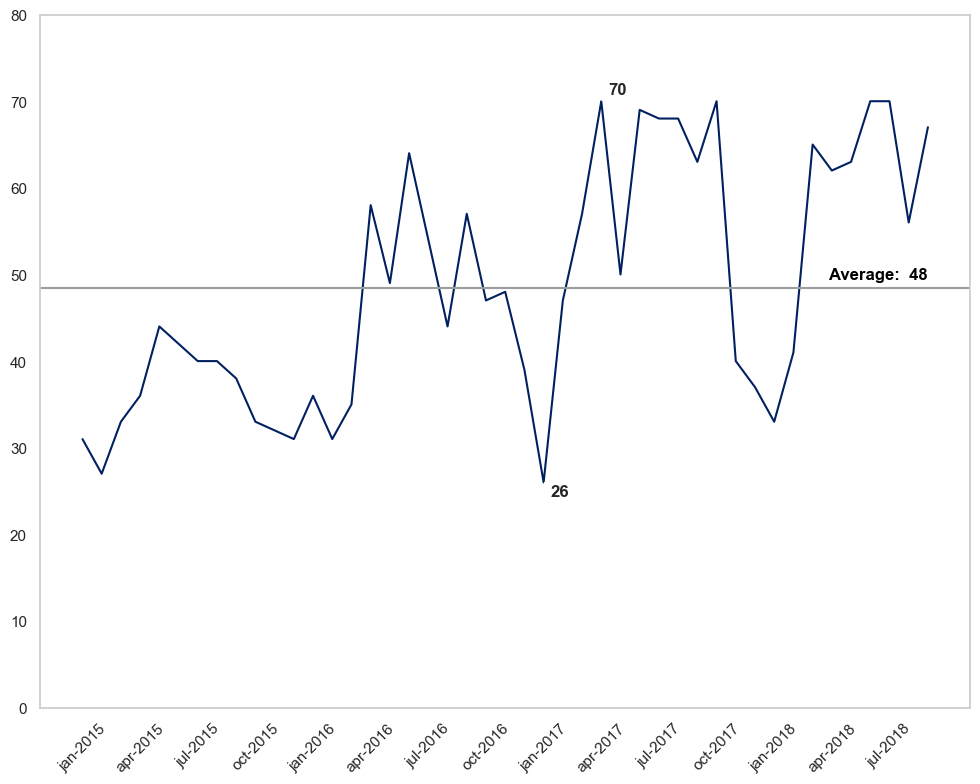

In [35]:
display(Markdown('#### Evolution of Number of Incidents with Children in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_line(data = incidents_children, x = 'MonthYear', y = 'Number of Incidents', x_tick_every = 3)
plt.ylim(0, 80)
avg = incidents_children['Number of Incidents'].mean()
plt.axhline(avg, color = '#9D9D9D')
plt.annotate(f'Average: {avg: .0f}', xy=(incidents_by_month['MonthYear'].values[-1], avg), xytext=(incidents_by_month['MonthYear'].values[-1], avg + 1),
             color='black', weight='bold', ha='right');

## Highlights
* The **average number** of incidents per month involving children is **182**, with a 49 standard deviation. 
* The number of incidents is **higher** during April-September, **peaking in June** at 245 incidents.
    * This probably happens because there are several school holidays during this period, and with children out of school, it increases the number of children riding buses. Also, during summer, more families choose to travel by bus instead of walking or cycling.

# 7 - Considering the description of the incident as "Injuries treated on scene", what's the total number of people for genders Male and Female?

In [36]:
q = """SELECT [Victims Sex], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Injury Result Description] = 'Injuries treated on scene'
       GROUP BY [Victims Sex]
       ORDER BY [Number of Incidents] DESC;"""

injuries_treated_on_scene = pysqldf(q)
injuries_treated_on_scene

,Victims Sex,Number of Incidents
0,Female,8816
1,Male,5632
2,Unknown,2888


#### Number of Incidents with Injuries treated on scene in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;In thousands

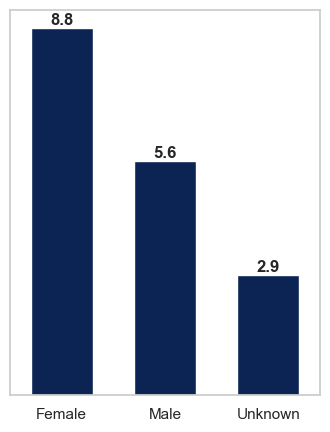

In [37]:
display(Markdown('#### Number of Incidents with Injuries treated on scene in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;In thousands'))
fgc_comparison_column(data = injuries_treated_on_scene, x = 'Victims Sex', y = 'Number of Incidents', formatting=format_number);

## Highlights

* Females lead the number of incidents with injuries treated on scene, but considering they're the most involved in incidents overall, the trend **does not mean much**.

# 8 - In 2017, in which month was there more incidents with elderly people?

In [38]:
q = """SELECT [Date Of Incident], [Victims Age], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Date Of Incident] LIKE '2017%' AND [Victims Age] = 'Elderly'
       GROUP BY [Date Of Incident]
       ORDER BY [Date Of Incident] ASC;"""

incidents2017 = pysqldf(q)
incidents2017

,Date Of Incident,Victims Age,Number of Incidents
0,2017-01-01 00:00:00.000000,Elderly,66
1,2017-02-01 00:00:00.000000,Elderly,53
2,2017-03-01 00:00:00.000000,Elderly,77
3,2017-04-01 00:00:00.000000,Elderly,75
4,2017-05-01 00:00:00.000000,Elderly,69
5,2017-06-01 00:00:00.000000,Elderly,65
6,2017-07-01 00:00:00.000000,Elderly,81
7,2017-08-01 00:00:00.000000,Elderly,70
8,2017-09-01 00:00:00.000000,Elderly,78
9,2017-10-01 00:00:00.000000,Elderly,69


In [39]:
incidents2017['Date Of Incident'] = pd.to_datetime(incidents2017['Date Of Incident'])
incidents2017

,Date Of Incident,Victims Age,Number of Incidents
0,2017-01-01,Elderly,66
1,2017-02-01,Elderly,53
2,2017-03-01,Elderly,77
3,2017-04-01,Elderly,75
4,2017-05-01,Elderly,69
5,2017-06-01,Elderly,65
6,2017-07-01,Elderly,81
7,2017-08-01,Elderly,70
8,2017-09-01,Elderly,78
9,2017-10-01,Elderly,69


In [40]:
incidents2017['Month Name'] = incidents2017['Date Of Incident'].dt.strftime('%b').str.lower()
incidents2017

,Date Of Incident,Victims Age,Number of Incidents,Month Name
0,2017-01-01,Elderly,66,jan
1,2017-02-01,Elderly,53,feb
2,2017-03-01,Elderly,77,mar
3,2017-04-01,Elderly,75,apr
4,2017-05-01,Elderly,69,may
5,2017-06-01,Elderly,65,jun
6,2017-07-01,Elderly,81,jul
7,2017-08-01,Elderly,70,aug
8,2017-09-01,Elderly,78,sep
9,2017-10-01,Elderly,69,oct


In [41]:
incidents2017['Number of Incidents'].std()

7.408021860037125

#### Evolution of Number of Incidents with Elderly people by Month in London Public Transportation (2017)
&nbsp;&nbsp;&nbsp;As a number

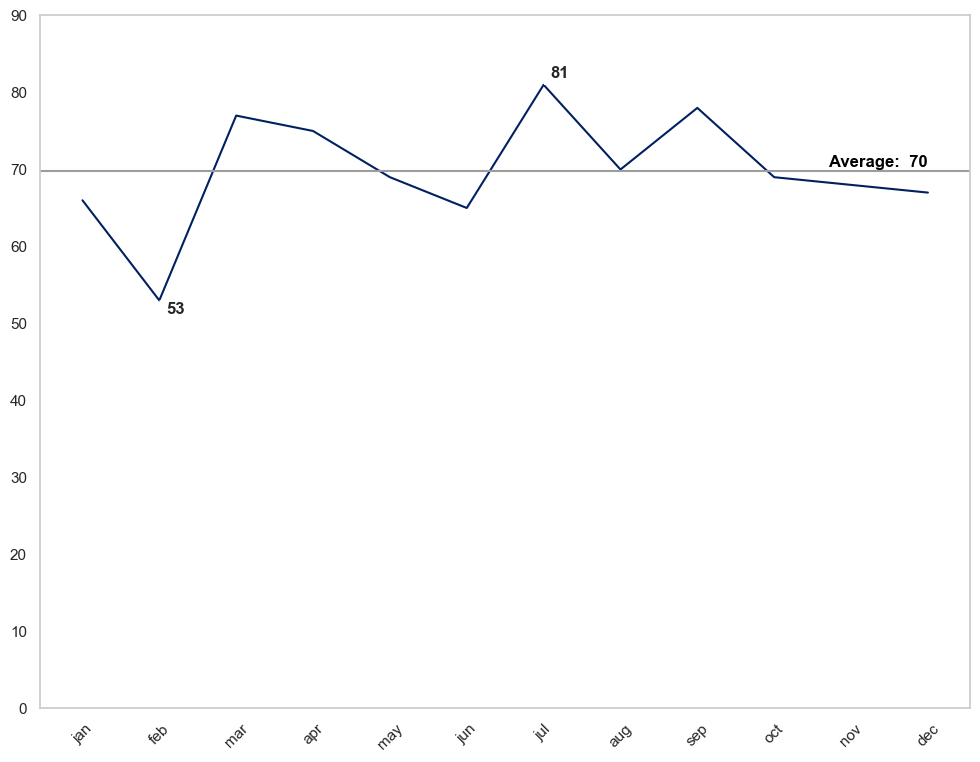

In [42]:
display(Markdown('#### Evolution of Number of Incidents with Elderly people by Month in London Public Transportation (2017)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_line(data = incidents2017, x = 'Month Name', y = 'Number of Incidents', x_tick_every = 1)
plt.ylim(0,90)
avg = incidents2017['Number of Incidents'].mean()
plt.axhline(avg, color = '#9D9D9D')
plt.annotate(f'Average: {avg: .0f}', xy=(incidents2017['Month Name'].values[-1], avg), xytext=(incidents2017['Month Name'].values[-1], avg + 0.5),
             color='black', weight='bold', ha='right');

## Highlights

* In 2017, **July** was the month with the **highest number of incidents** involving elderly people (81).
* **On average**, there were 70 (+- 7.4) incidents per month involving Elderly people in 2017.

# 9 - Considering the Bus Driver, what's the distribution of incidents with time?

In [43]:
q = """SELECT [Date Of Incident], [Victim Category], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Victim Category] = 'Bus Driver'
       GROUP BY [Date Of Incident]
       ORDER BY [Date Of Incident] ASC;"""

busdriver_incidents = pysqldf(q)
busdriver_incidents

,Date Of Incident,Victim Category,Number of Incidents
0,2015-01-01 00:00:00.000000,Bus Driver,23
1,2015-02-01 00:00:00.000000,Bus Driver,28
2,2015-03-01 00:00:00.000000,Bus Driver,25
3,2015-04-01 00:00:00.000000,Bus Driver,33
4,2015-05-01 00:00:00.000000,Bus Driver,33
5,2015-06-01 00:00:00.000000,Bus Driver,38
6,2015-07-01 00:00:00.000000,Bus Driver,40
7,2015-08-01 00:00:00.000000,Bus Driver,28
8,2015-09-01 00:00:00.000000,Bus Driver,21
9,2015-10-01 00:00:00.000000,Bus Driver,29


In [44]:
busdriver_incidents['Date Of Incident'] = pd.to_datetime(busdriver_incidents['Date Of Incident'])
busdriver_incidents

,Date Of Incident,Victim Category,Number of Incidents
0,2015-01-01,Bus Driver,23
1,2015-02-01,Bus Driver,28
2,2015-03-01,Bus Driver,25
3,2015-04-01,Bus Driver,33
4,2015-05-01,Bus Driver,33
5,2015-06-01,Bus Driver,38
6,2015-07-01,Bus Driver,40
7,2015-08-01,Bus Driver,28
8,2015-09-01,Bus Driver,21
9,2015-10-01,Bus Driver,29


In [45]:
busdriver_incidents['MonthYear'] = busdriver_incidents['Date Of Incident'].dt.strftime('%b').str.lower() + '-' +  busdriver_incidents['Date Of Incident'].dt.year.astype('str')
busdriver_incidents

,Date Of Incident,Victim Category,Number of Incidents,MonthYear
0,2015-01-01,Bus Driver,23,jan-2015
1,2015-02-01,Bus Driver,28,feb-2015
2,2015-03-01,Bus Driver,25,mar-2015
3,2015-04-01,Bus Driver,33,apr-2015
4,2015-05-01,Bus Driver,33,may-2015
5,2015-06-01,Bus Driver,38,jun-2015
6,2015-07-01,Bus Driver,40,jul-2015
7,2015-08-01,Bus Driver,28,aug-2015
8,2015-09-01,Bus Driver,21,sep-2015
9,2015-10-01,Bus Driver,29,oct-2015


In [46]:
busdriver_incidents['Number of Incidents'].std()

7.1429841258554

#### Evolution of the Number of Incidents involving the Bus Driver in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;As a number

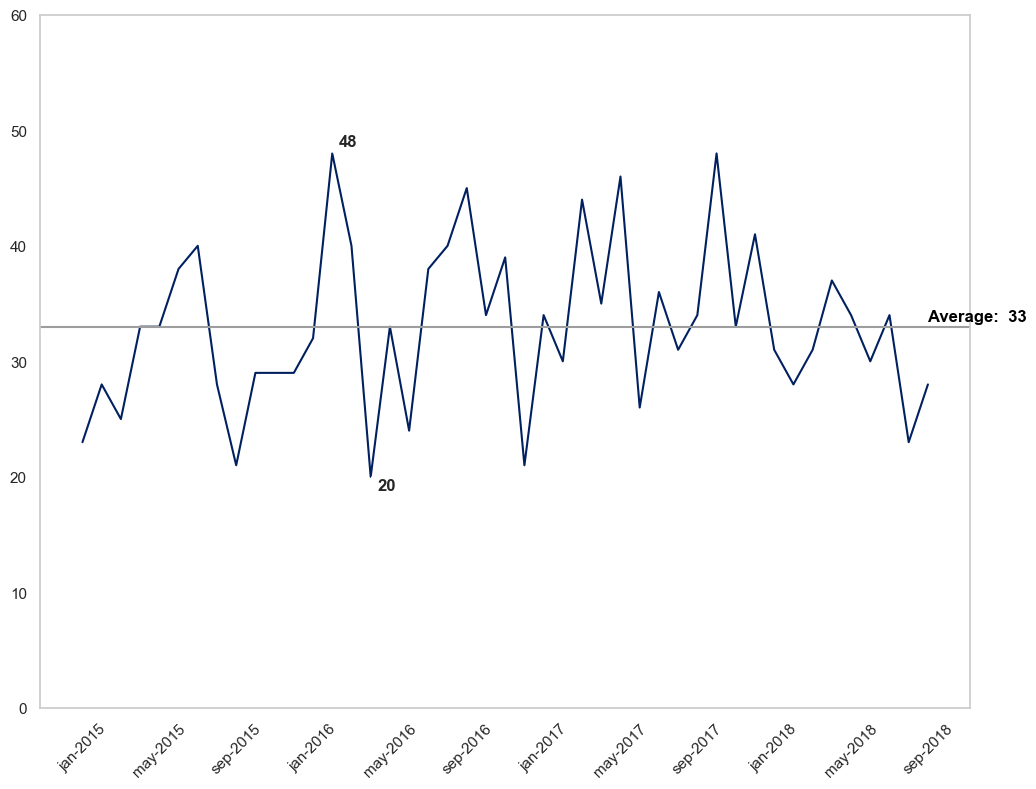

In [47]:
display(Markdown('#### Evolution of the Number of Incidents involving the Bus Driver in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_line(data = busdriver_incidents, x = 'MonthYear', y = 'Number of Incidents', x_tick_every = 4)
plt.ylim(0, 60)
avg = busdriver_incidents['Number of Incidents'].mean()
plt.axhline(avg, color = '#9D9D9D')
plt.annotate(f'Average: {avg: .0f}', xy=(busdriver_incidents['MonthYear'].values[-1], avg), xytext=(busdriver_incidents['MonthYear'].values[-1], avg + 0.5),
             color='black', weight='bold', ha='left');

## Highlights

* On average, there were 33 (+- 7.1) incidents involving the Bus Driver in London Public Transportation from 2015 to 2018.
* The **highest number of incidents (48)** involving the Bus Driver in London Public Transportation happened in **February 2016** .

# 10 - What's the most common incident with cyclists?

In [48]:
q = """SELECT [Victim Category], [Incident Event Type], COUNT(*) AS [Number of Incidents]
       FROM df 
       WHERE [Victim Category] = 'Cyclist'
       GROUP BY [Incident Event Type]
       ORDER BY [Number of Incidents] DESC;"""

cyclist_incidents = pysqldf(q)
cyclist_incidents

,Victim Category,Incident Event Type,Number of Incidents
0,Cyclist,Collision Incident,256
1,Cyclist,Personal Injury,8
2,Cyclist,Slip Trip Fall,7
3,Cyclist,Onboard Injuries,4


#### Number of Incidents involving Cyclists By Event Type in London Public Transportation (2015-2018)
&nbsp;&nbsp;&nbsp;As a number

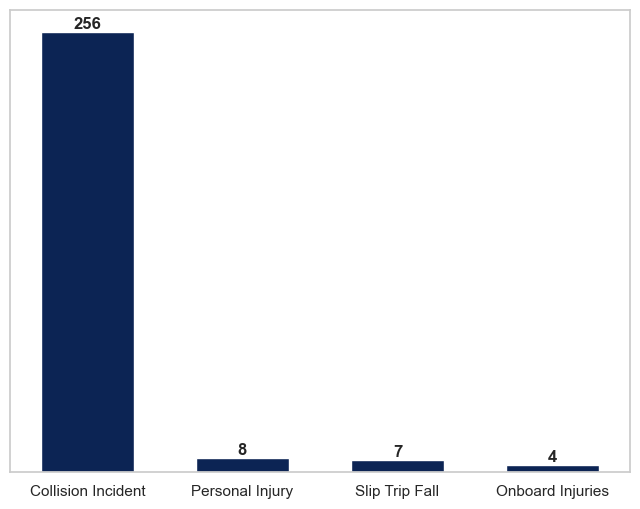

In [49]:
display(Markdown('#### Number of Incidents involving Cyclists By Event Type in London Public Transportation (2015-2018)\n&nbsp;&nbsp;&nbsp;As a number'))
fgc_comparison_column(data = cyclist_incidents, x = 'Incident Event Type', y = 'Number of Incidents',
                      size = (8, 6));

## Highlights
* The huge majority of incidents (256) involving Cyclists in London Public Transportation between 2015 and 2018 were **Collision Incidents**.

# Conclusions

After analyzing the dataset, some key takeaways are:

* **Female** were the most involved in incidents in London Public Transportation between 2015 and 2018, and most of the incidents were Slip Trip Falls and Onboard Injuries.
* **Adults** are more involved in incidents than other age ranges.
* Slip Trip Falls and Onboarding Injuries are the most common type of incidents.
* The average number of incidents increased after July 2016.
* The **peak** in the number of incidents involving Female occured in **November 2016** (63 incidents).
* The **average number** of incidents per month involving children is **182**, with a 49 standard deviation. 
* Females also lead the number of incidents with injuries treated on scene.
* In 2017, **July** was the month with the **highest number of incidents** involving elderly people (81).
* On average, there were 33 (+- 7.1) incidents involving the Bus Driver in London Public Transportation from 2015 to 2018.
* The most common incidents with Cyclists in London Public Transportation between 2015 and 2018 were Collision Incidents.